In [1]:
!pip install -r requirements.txt

In [2]:
from agents.theoritical_agent import *
from agents.angle_agent import *
from agents.observation_agent import *
from agents.control_rnn import *
from agents.pre_rnn import *
from agents.post_rnn import *
from agents.universal_rnn import *
from env import *
import numpy as np
from tf_to_mat import *

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

2024-01-30 17:01:39.078329: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 17:01:39.104693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 17:01:39.104715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 17:01:39.105346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 17:01:39.109279: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 17:01:39.109586: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
tf.keras.backend.set_floatx('float64')

In [4]:
#Parameters
kappa = 0.5 #Kappa for the von mises
deck_size = 12 #length sequences
optimal_training = False #Training on optimal labels instead of real ones

nb = 1 #Nb of networks to train
batch_size = 2000 #Batch size for the training (length of the training)
rnn_noise = None #Std for noisy networks (put None if you don't want a noisy network)
random_training = True #Training on sequence of random length chosen uniformely in [|1,12|]
separated_params = (10,2) #(Nb of neurons which will see the first part of the input,size of the first part of the input)

free_feedback = True #True = free feedback in the recurrent network / False = only REF -> SEQ feedbacks

activation = 'tanh' #Activation function

separated = False #Separated network

condition = 'control'

In [5]:
if optimal_training:
    random_training = False #Random training cannot be used with random_training (technical issues)

In [6]:
env = Env(deck_size,kappa=kappa,condition=condition)
agent = UniversalRNN(50,activation=activation,noise=rnn_noise,random_training=random_training)
agent.postname = condition #Set path name for saving and loading

In [7]:
def train(agent,env,nb_episodes=1):
    for i in range(nb_episodes):
        curve = []
        #Train the network
        agent.train(env,1,batch_size=2000,nb_fit=5,verbose=1)
        #Evaluate the network
        env = Env(deck_size,kappa=kappa)
        acc = agent.evaluate(env.sample_batch(20000))
        print(i,"acc :",acc)
        #Save accuracies
        curve.append(agent.scores)
    return curve

In [11]:
curve = train(agent,env,10)
agent.save('UniversalRNN-'+str(condition))

0 0.475
0 acc : 0.5032
0 0.5115
1 acc : 0.4991
0 0.498
2 acc : 0.5003
0 0.5095
3 acc : 0.4984
0 0.4935
4 acc : 0.50985
0 0.5155
5 acc : 0.52595
0 0.506
6 acc : 0.5409
0 0.548
7 acc : 0.5595
0 0.574
8 acc : 0.56465
0 0.574
9 acc : 0.57305
SAVING ['nn', 'out_nn']


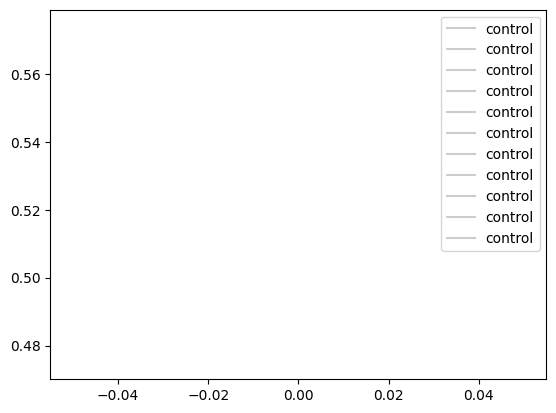

In [14]:
#Plot accuracies
plt.plot(range(len(curve)),curve,alpha=0.4,color='grey',label=condition)
plt.legend()
plt.show()